# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crime_data.csv')
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
df.shape

(50, 5)

In [5]:
# Renaming the column as Unnmaed doesn't make sense.

df = df.rename(columns={'Unnamed: 0':'State'})

In [6]:
df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA

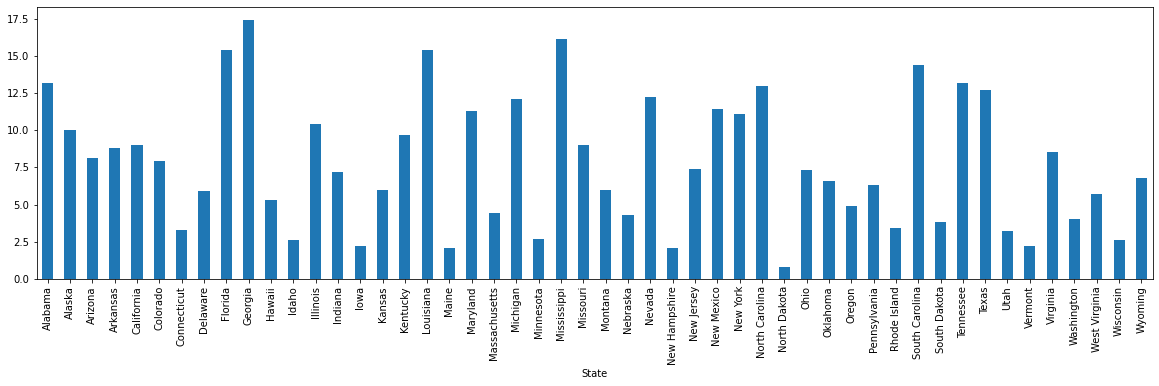

In [7]:
# Murder Rate

plt.figure(figsize=(20,5))
df.groupby('State')['Murder'].max().plot(kind='bar')

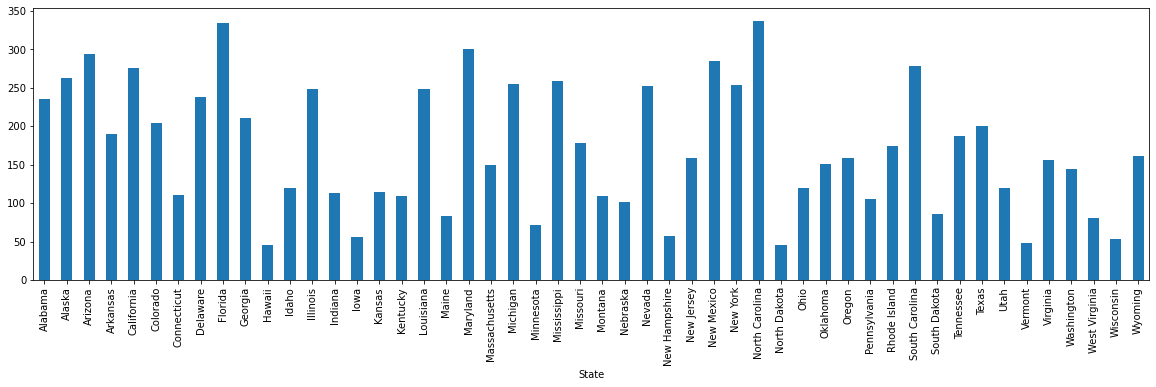

In [8]:
# Assault Rate

plt.figure(figsize=(20,5))
df.groupby('State')['Assault'].max().plot(kind='bar')

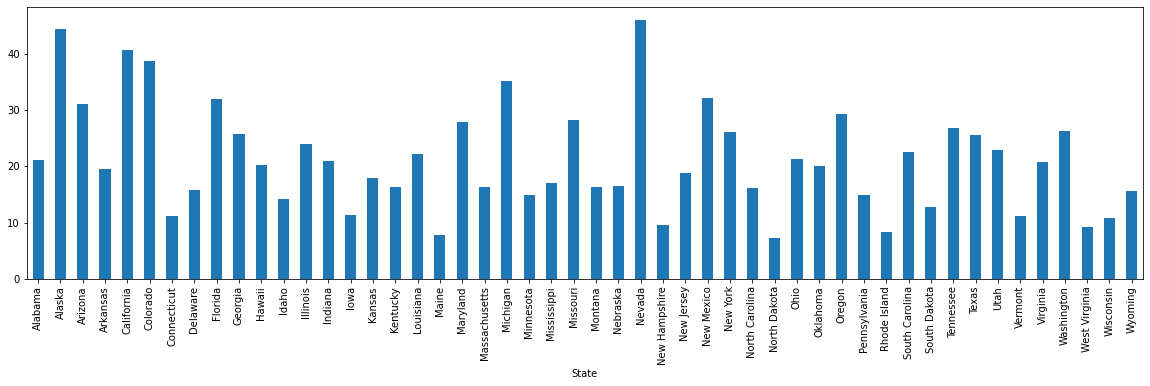

In [9]:
# Rape Rate

plt.figure(figsize=(20,5))
df.groupby('State')['Rape'].max().plot(kind='bar')

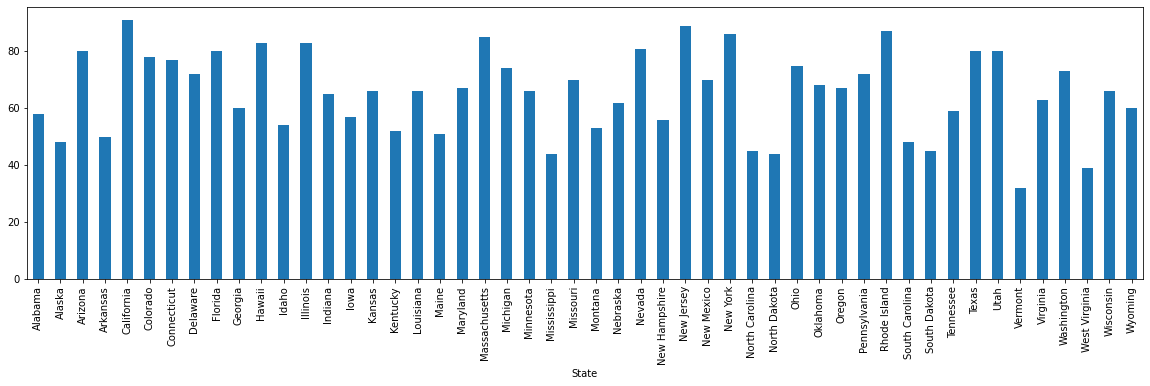

In [10]:
# UrbanPop

plt.figure(figsize=(20,5))
df.groupby('State')['UrbanPop'].max().plot(kind='bar')

Text(0, 0.5, 'Murder Rate')

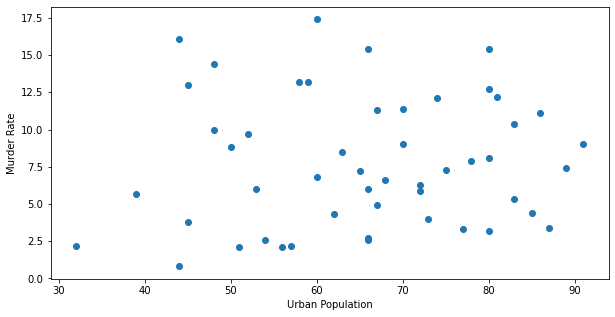

In [11]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Rape Rate')

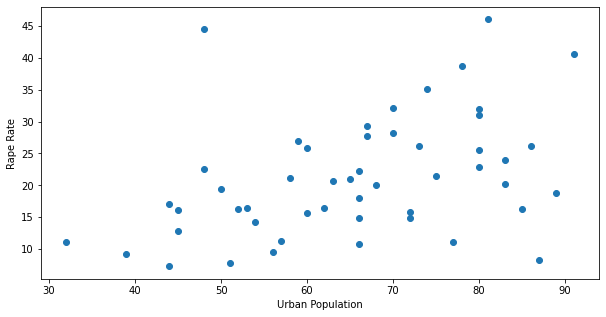

In [12]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

Text(0, 0.5, 'Assault Rate')

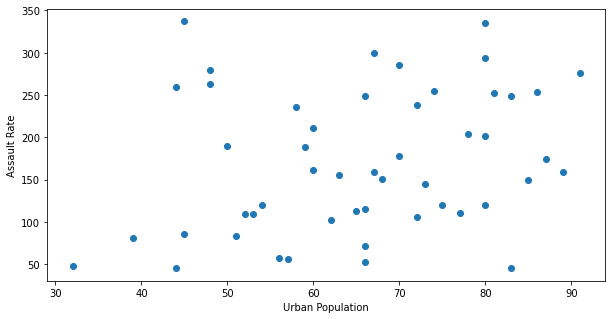

In [13]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

In [14]:
data = df.iloc[:,1:].values

In [15]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaled_data = scaler.fit_transform(data)

## Typesof Linkage
### 1) Single Linkage

The distance between 2 clusters is defined as the shortest distance between points in the two clusters

Text(0, 0.5, 'Euclidean distances')

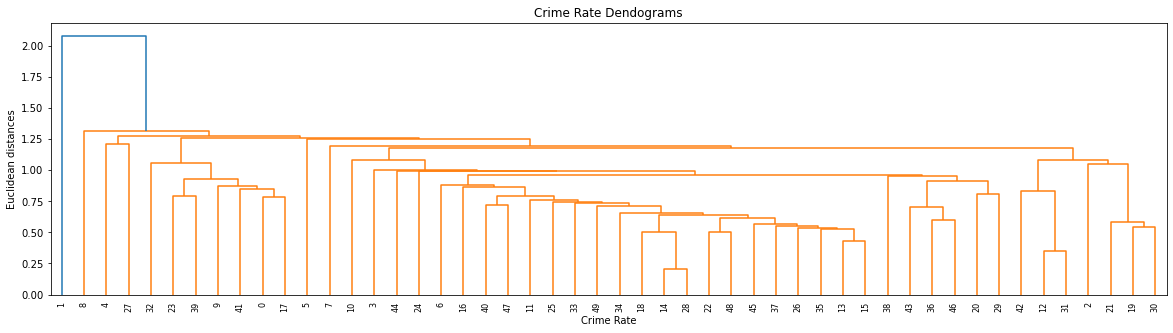

In [16]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

### 2) Complete Linkage
The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

Text(0, 0.5, 'Euclidean distances')

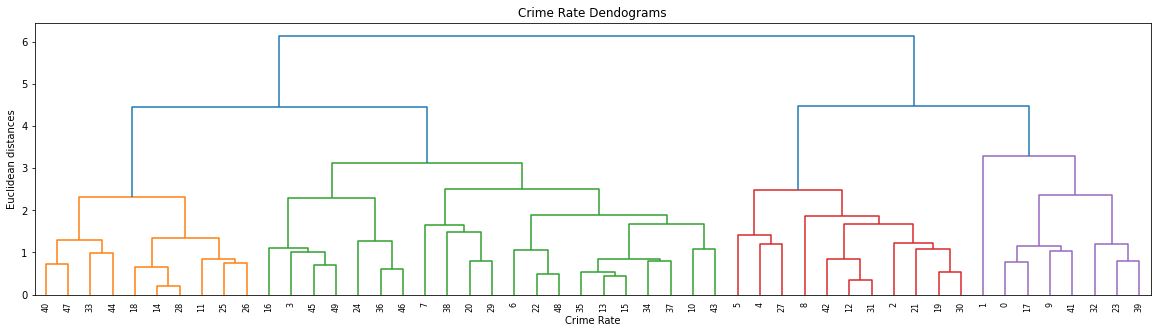

In [17]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

### 3) Average Linkage:
The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Euclidean distances')

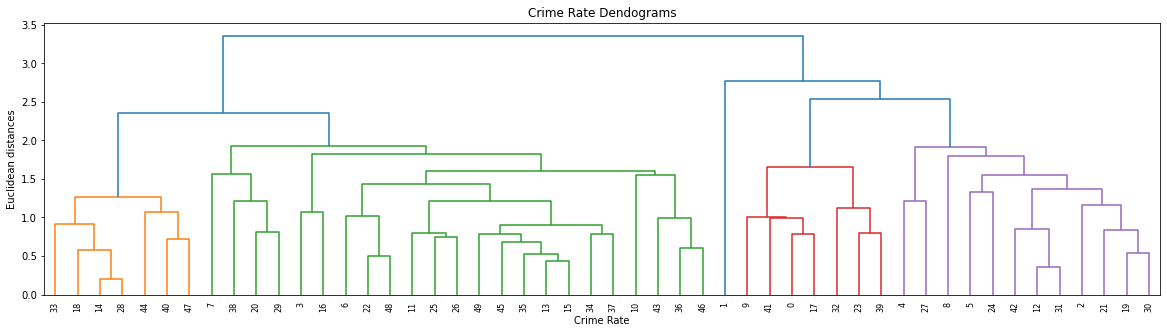

In [18]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

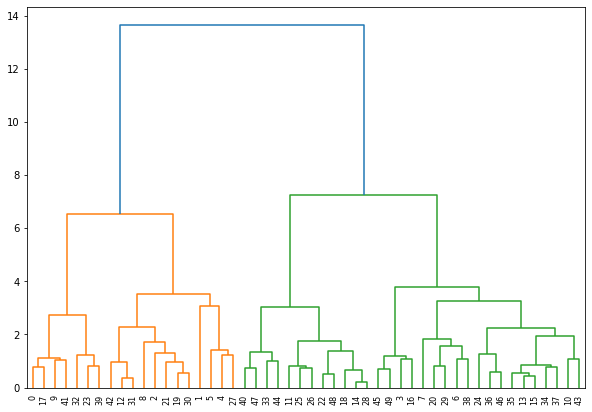

In [19]:
# create dendrogram
fig = plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))

In [20]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [21]:
# Fit and predict to have the cluster labels.
y_pred =hc.fit_predict(scaled_data)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [22]:
# Fetch the cluster labels
df['cluster labels']= y_pred
df

,State,Murder,Assault,UrbanPop,Rape,cluster labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


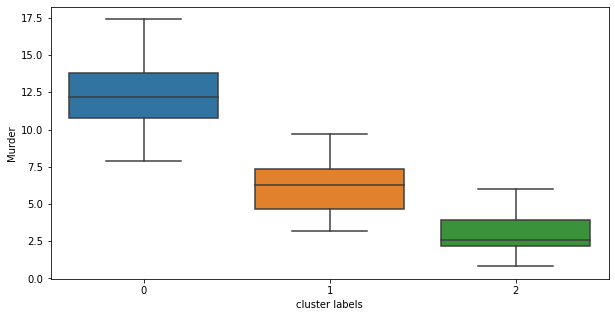

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=df)

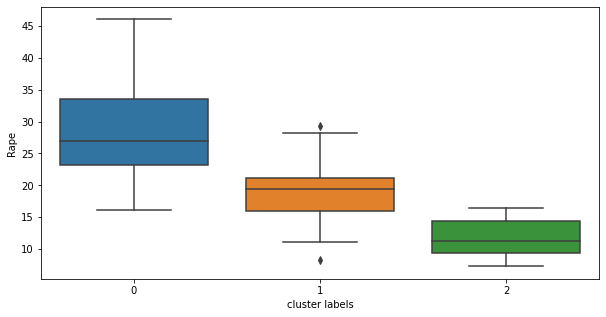

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=df)

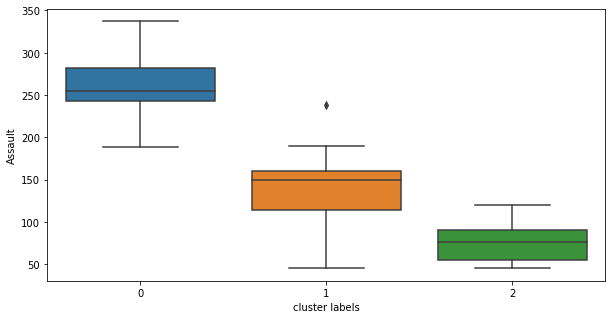

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=df)

The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.


The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.


The Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

In [26]:
safe_Zone= df.groupby('cluster labels')['State'].unique()[0]
safe_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina', 'Tennessee', 'Texas'],
      dtype=object)

In [27]:
Danger_Zone= df.groupby('cluster labels')['State'].unique()[1]
Danger_Zone

array(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana',
       'Kansas', 'Kentucky', 'Massachusetts', 'Missouri', 'New Jersey',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'Utah', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

In [28]:
Moderate_Zone= df.groupby('cluster labels')['State'].unique()[2]
Moderate_Zone

array(['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont',
       'West Virginia', 'Wisconsin'], dtype=object)

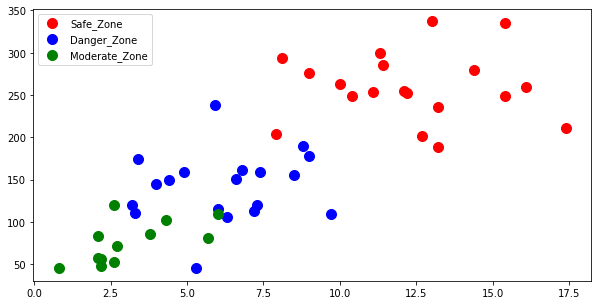

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()

# K-means Clustering

In [30]:
crime = pd.read_csv('crime_data.csv', index_col=0)

In [31]:
crime.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [32]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [33]:
#standardize the data to normal distribution
from sklearn import preprocessing
crime_standardized = preprocessing.scale(crime)
print(crime_standardized)
crime_standardized = pd.DataFrame(crime_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

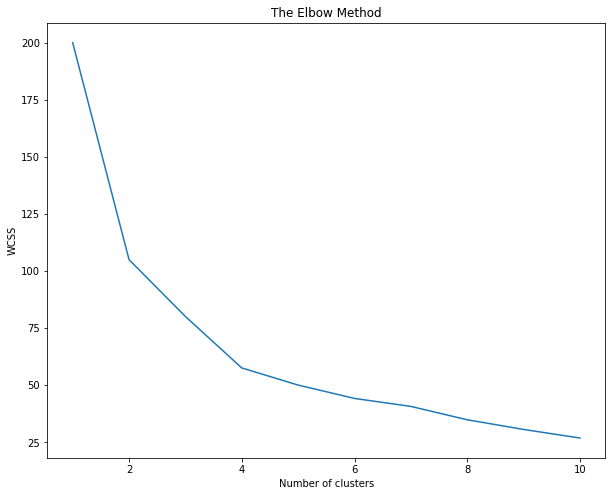

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=4 and let's use it to determine the clusters.

In [35]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_standardized)

y_kmeans

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [36]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime['cluster'] = cluster

In [37]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,13.9,243.6,53.8,21.4
2,5.7,138.9,73.9,18.8
3,3.6,78.5,52.1,12.2
4,10.8,257.4,76.0,33.2


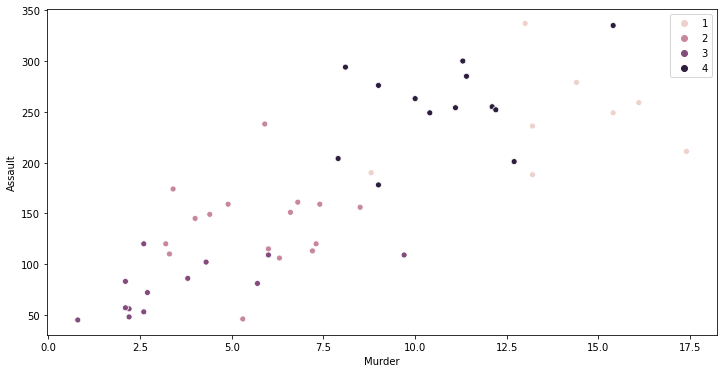

In [38]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=y_kmeans1)